First few rows of the dataset:
   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0       04-10-2018                              Phone   
1       11-06-2018             

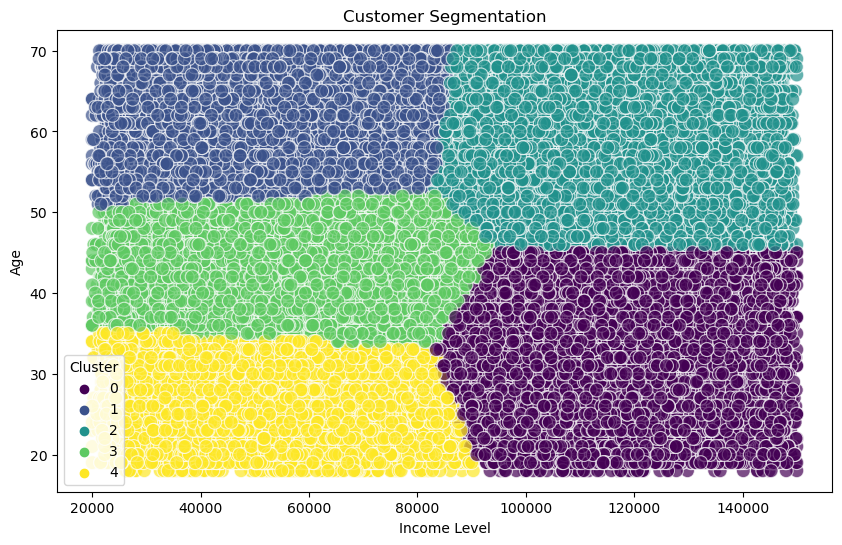

Segmented data saved to segmented_customers.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('customer_segmentation_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Perform exploratory data analysis (EDA)
print("\nData summary:")
print(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Select relevant numerical features for clustering
features = data[['Age', 'Income Level']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income Level', y='Age', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

# Save the segmented data to a CSV file
output_file_path = 'segmented_customers.csv'  # Update with your desired output file path
data.to_csv(output_file_path, index=False)
print(f"Segmented data saved to {output_file_path}")
